<div style="border:solid green 3px; padding: 20px">
<b>🥇 Илья, спасибо за доработки, проект принят, молодец!</b>
    
Ты провел  хорошую работу над ошибками! Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂
    

<div style="border:solid green 2px; padding: 20px">
Илья, привет! Меня зовут Ефимов Денис и сегодня я буду делать ревью твоего проекта!
    
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> Некритичное замечание, рекомендация.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Ты проделал огромную работу :)
- У меня есть несколько замечаний, исправив которые ты сделаешь проект  лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



Анализ данных и проверка гипотез о пользователях и поездках сервиса аренды самокатов GoFast.

Данные представлены тремя датафреймами в формате CSV: users_go, rides_go, subscriptions_go. Первый хранит информацию о каждом пользователе (его id, имя, возраст, город, тип подписки). Во втором содержатся данные о дате, длительности и дистанции каждой поездки. Третий хранит информацию о стоимости услуг для каждого типа подписки. 

Цель исследования: анализ данных и проверка гипотез, которые могу помочь бизнесу вырасти.

План исследования: 
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчет выручки
6. Проверка гипотез
7. Работа с распределениями

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Можно добавить описание имеющихся данных. Стоит задуматься, как еще можно дополнить введение, чтобы сделать более ценным для читателя.
    
Также советую тебе взглянуть на <a href="https://www.kaggle.com/notebooks/">работы</a> профессиональных аналитиков, чтобы оценить, как другие люди оформляют и проводят исследования.    </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
✔
</div>

#### Шаг 1. Загрузка данных

Импортируем необходимые для дальнейшей работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom
from math import factorial

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Правильно, что импортируешь все библиотеки в отдельной ячейке!  </div>

Сохраним CSV-файлы в датафреймы pandas.

In [2]:
#данные о пользователях
users = pd.read_csv('/datasets/users_go.csv')
#данные о поездках
rides = pd.read_csv('/datasets/rides_go.csv')
#данные о подписках
subs = pd.read_csv('/datasets/subscriptions_go.csv')

Посмотрим общую информацию о датафреймах.

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице с данными о пользователях 1565 записей. Пропусков нет. Типы данных в каждом столбце соответствуют содержимому.

In [4]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [55]:
rides.memory_usage()

Index          128
user_id     144544
distance    144544
duration    144544
date        144544
month       144544
dtype: int64

В таблице с данными о поездках 18068 записей. Пропусков нет. Столбец с информацией о датах поездок представлен текстовым типом данных, необходимо в дальнейшем заменить на "datetime".

In [6]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В таблице с данными о подписках всего 2 записи. Пропусков нет. Необходимости менять тип данных тоже нет.

Выведем на экран несколько строк из каждого датафрейма.

In [7]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [8]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [9]:
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Данные загружены. Готовы к предобработке.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично, с данными познакомились!  </div>

#### Шаг 2. Предобработка данных

Приведем столбец с датами поездок к соответствующему типу.

In [10]:
rides['date'] = rides['date'].astype('datetime64')

Проверим работу функции.

In [11]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Тип данных в столбце успешно изменен.

Создадим в таблице rides новый столбец с номером месяца.

In [12]:
rides['month'] = rides['date'].dt.month

Проверяем получилось ли добавить столбец.

In [13]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [14]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [15]:
rides['month'].unique()

array([ 1,  4,  8, 10, 11, 12,  3,  6,  7,  2,  5,  9])

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Проверим данные за какой период у нас имеются.
</div>

In [16]:
rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [17]:
rides['date'].max()

Timestamp('2021-12-30 00:00:00')

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Данные представлены периодом с 1 января по 30 декабря 2021 года.
</div>

Столбец с номером месяца успешно добавлен.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Дополнительно лучше проверить данные за какой период у нас имеются, чтобы в дальнейшем не допустить ошибок при группировке по месяцам.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
✔
</div>

Проверим данные на наличие дубликатов. Начнем с явных дубликатов.

In [18]:
users.duplicated().sum()

31

В таблице users 31 дубликат. Удалим их.

In [19]:
print(f'Количество записей в таблице users равно {len(users)}, количество дубликатов в таблице равно {users.duplicated().sum()}.')
print(f'Соответственно количество записей в таблице после удаления дубликатов должно равняться {len(users) - users.duplicated().sum()}')

Количество записей в таблице users равно 1565, количество дубликатов в таблице равно 31.
Соответственно количество записей в таблице после удаления дубликатов должно равняться 1534


In [20]:
#удаляем дубликаты
users = users.drop_duplicates().reset_index(drop = True)

In [21]:
f'Количество записей в users после удаления дубликатов составляет {len(users)}'

'Количество записей в users после удаления дубликатов составляет 1534'

Дубликаты успешно удалены из таблицы users.

Посмотрим дубликаты из датафрейма rides.

In [22]:
rides.duplicated().sum()

0

Явных дубликатов нет.

Таблицу с данными о подписках проверять на дубликаты не будем, т.к. там всего 2 записи. При выводе таблицы на экран выше, можно увидеть, что дубликатов в ней нет.

Проверим столбцы с категориальными данными на неявные дубликаты.

Начнем с данных об именах пользователей.

In [23]:
#приведем данные к нижнему регистру
users['name'] = users['name'].str.lower()
users['name'].unique()

array(['кира', 'станислав', 'алексей', 'константин', 'адель', 'регина',
       'игорь', 'юрий', 'ян', 'валерий', 'агата', 'марк', 'ева',
       'антонина', 'валерия', 'амалия', 'даниил', 'аделина', 'святогор',
       'борис', 'вероника', 'ростислав', 'назар', 'эдуард', 'василий',
       'денис', 'тамара', 'николай', 'эвелина', 'федор', 'руслан', 'иван',
       'любовь', 'ярослава', 'майя', 'ильдар', 'данила', 'нина',
       'стефания', 'ясмина', 'дмитрий', 'александр', 'одиссей', 'арсений',
       'алла', 'таисия', 'максим', 'юлиана', 'павел', 'карина', 'алиса',
       'лидия', 'рамиль', 'родион', 'ника', 'оксана', 'анастасия',
       'маргарита', 'вера', 'тимур', 'никита', 'лев', 'влад', 'артур',
       'анна', 'ольга', 'вячеслав', 'ксения', 'виталина', 'владислав',
       'тамерлан', 'амина', 'вадим', 'олеся', 'зарина', 'егор', 'гордей',
       'лилия', 'святослав', 'роберт', 'амир', 'влада', 'богдан',
       'полина', 'марат', 'елисей', 'макар', 'алина', 'глеб', 'андрей',
       'ал

Дубликатов нет.

Проверим столбец с названиями городов.

In [24]:
users['city'] = users['city'].str.lower()
users['city'].unique()

array(['тюмень', 'омск', 'москва', 'ростов-на-дону', 'краснодар',
       'пятигорск', 'екатеринбург', 'сочи'], dtype=object)

Дубликатов нет.

Проверим данные с типом подписки.

In [25]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

Предобработка данных завершена.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
После этапа предобработки следует сделать краткий резюмирующий вывод о проделанной работе.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
В ходе предобработки данных были внесены следующие корректировки: тип данных в столбце с датой и временем был изменен с текстового на "datetime64"; в таблицу rides был добавлен столбец с номером месяца поездки; были удалены дубликаты из датафрейма users, а содержимое столбцов с именами пользователей и названиями городов были приведены к нижнему регистру.
</div>

#### Шаг 3. Исследовательский анализ данных

Визуализируем информацию о частоте встречаемости городов с помощью столбчатой диаграммы.

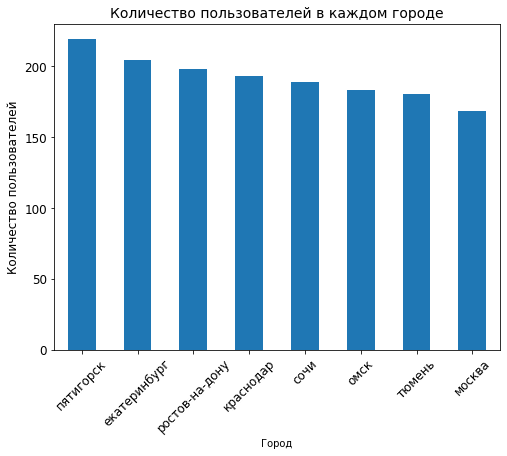

In [26]:
# сгруппируем данные по городам и посчитаем количество пользователей в каждом из них.
# на основе сгрупированных данных строим график
users.groupby('city')['user_id'].count().sort_values(ascending = False).plot(kind = 'bar', figsize = (8,6), fontsize = 12)
plt.xlabel('Город')
plt.ylabel('Количество пользователей', fontsize = 12)
# названия городов написаны вертикально, из-за чего их неудобно читать. Сделаем для удобства текст по диагонали.
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Количество пользователей в каждом городе', fontsize = 14)
plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Для удобства можно повернуть график на 90 градусов и сделать сортировку по убыванию.</div>

Из 8 представленных в датафрейме городов, самым популярным оказался Пятигорск, далее идут Екатеринбург и Ростов-на-Дону. Замыкают восьмерку Омск, Тюмень и Москва.

Визуализируем данные о соотношении пользователей с подпиской и без с помощью круговой диаграммы.

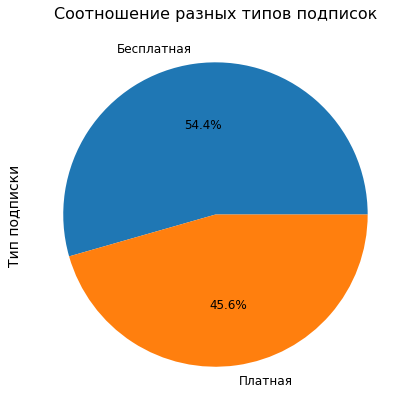

In [27]:
users.groupby('subscription_type')['user_id'].count().plot(kind = 'pie', figsize = (7,7), labels = ['Бесплатная', 'Платная'], autopct = '%1.1f%%', fontsize = 12)
plt.ylabel('Тип подписки', fontsize = 14)
plt.title('Соотношение разных типов подписок', fontsize = 16)
plt.show()

54,4% пользователей используют бесплатную подписку, 45,6% - платную.

Визуализируем данные о возрасте пользователей с помощью гистограммы.

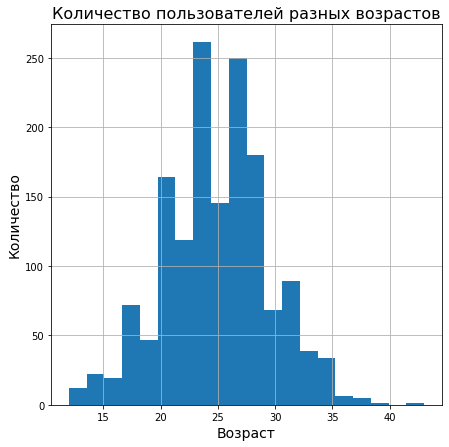

In [28]:
users['age'].hist(bins = 20, figsize = (7,7))
plt.xlabel('Возраст', fontsize = 14)
plt.ylabel('Количество', fontsize = 14)
plt.title('Количество пользователей разных возрастов', fontsize = 16)
plt.show()

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Очень хорошо, что подписываешь графики и оси. </div>

Как мы видим из графика, сервисом пользуются люди возрастом от ~10 лет до 40+ лет. Наиболее популярен сервис у пользователей 20-30 лет.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

В качестве дополнительного инструмента для анализа можно использовать `describe()`</div>

Посмотрим данные о расстоянии пользователей за одну поездку с помощью гистрограммы.

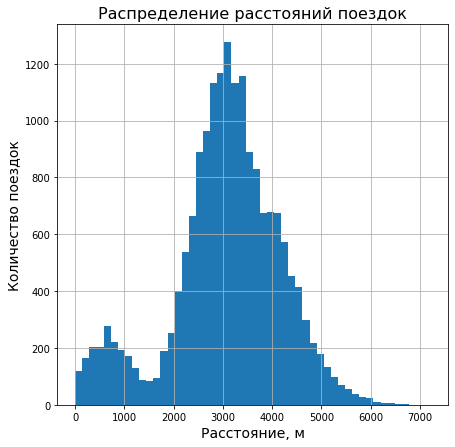

In [29]:
rides['distance'].hist(bins = 50, figsize = (7,7))
plt.xlabel('Расстояние, м', fontsize = 14)
plt.ylabel('Количество поездок', fontsize = 14)
plt.title ('Распределение расстояний поездок', fontsize = 16)
plt.show()

Мы видим на гистограмме 2 пика распределения. Один большой в районе ~3000 м, другой - маленький, в районе ~500 метров.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Как ты думаешь, чем можно объяснить два пиковых значения на распределении?</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Возможно пользователи разных городов преодолевают разные расстояния из-за разных размеров этих самых городов. Это можно проверить, но в информация о городе находится в таблице users, а объединение таблиц будет произведено только на следующем шаге.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> А еще короткими могут быть поездки до ближайшей станции метро или остановки общественного транспорта. </div>

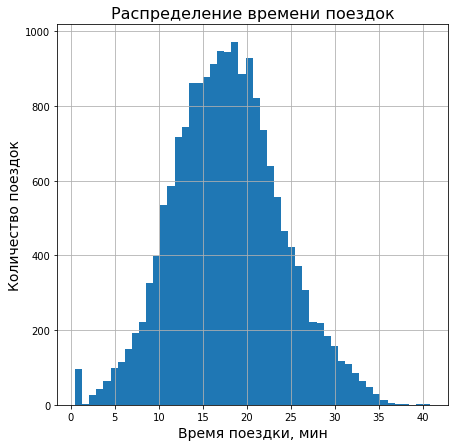

In [30]:
rides['duration'].hist(bins = 50, figsize = (7,7))
plt.xlabel('Время поездки, мин', fontsize = 14)
plt.ylabel('Количество поездок', fontsize = 14)
plt.title ('Распределение времени поездок', fontsize = 16)
plt.show()

Время поездок нормально распределено с центром в районе ~17 минут. В районе нуля наблюдаем пик. Рассмотрим его поближе. 

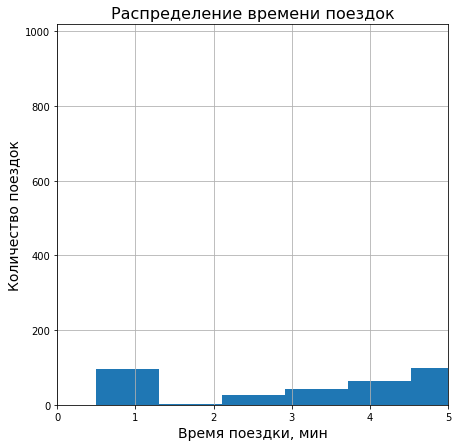

In [31]:
rides['duration'].hist(bins = 50, figsize = (7,7))
#ограничим гистограмму временем от 0 до 5 минут
plt.xlim(0,5)
plt.xlabel('Время поездки, мин', fontsize = 14)
plt.ylabel('Количество поездок', fontsize = 14)
plt.title ('Распределение времени поездок', fontsize = 16)
plt.show()

Пик приходится в районе одной минуты. Рассмотрим эти данные.

In [32]:
# выводим на экран поездки, продолжительность которых меньше или равна одной минуте
rides.query('duration <=1')

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Как видно из отфильтрованного датафрейма, много данных о расстоянии равным 0,5. По-видимому это минимальное расстояние, которое записывается в базу данных. Т.е. это те поездки, которые пользователи завершили сразу же после начала.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Но это ведь не расстояние, а продолжительность поездки.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Да, не заметил, что перепутал длительность и расстояние, когда писал вывод.
</div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b>

А не обратил ли ты внимание на дистанции этих поездок?</div>

Исследовательский анализ завершен.

#### Шаг 4. Объединение данных

Объеденим 3 датафрейма в один. Для начала объединим датафреймы users и rides. Затем к объединенному датафрему присоединим таблицу subs.

In [33]:
df = users.merge(rides, on = 'user_id')
df = df.merge(subs, on = 'subscription_type')

Проверяем полученный датафрейм.

In [34]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,кира,22,тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,кира,22,тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,кира,22,тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,кира,22,тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,кира,22,тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Таблицы объединены. Данные не потеряны.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Молодец, что проверил!</div>

Разделим полученный датафрейм на 2 отдельных. Один для пользователей с подпиской, другой - без.

In [35]:
df_ultra = df.query('subscription_type == "ultra"')
df_free = df.query('subscription_type == "free"')

Проверим получившиеся таблицы.

In [36]:
df_ultra.info()
df_ultra.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,кира,22,тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,кира,22,тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,кира,22,тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,кира,22,тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,кира,22,тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [37]:
df_free.info()
df_free.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,айдар,22,омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,айдар,22,омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,айдар,22,омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,айдар,22,омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,айдар,22,омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [38]:
print(f'Размер датафрейма df - {len(df)} строк. В датафреймах df_users и df_free в сумме {len(df_free)+len(df_ultra)} строк.')
print(f'Соответственно разделение таблиц прошло без потери данных.')

Размер датафрейма df - 18068 строк. В датафреймах df_users и df_free в сумме 18068 строк.
Соответственно разделение таблиц прошло без потери данных.


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Таблицы созданы верно!  </div>

Визуализируем данные о расстоянии для пользователей без подписки.

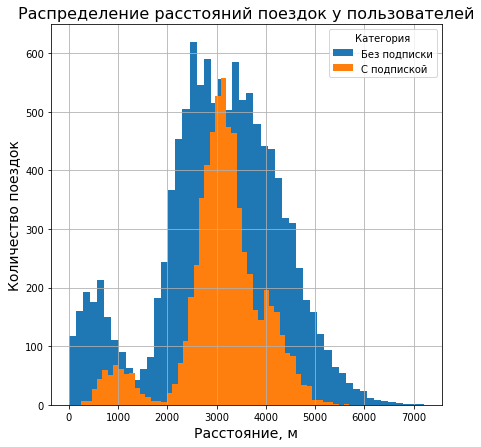

In [39]:
ax = df_free['distance'].hist(bins = 50, figsize = (7,7))
df_ultra['distance'].hist(ax=ax, bins = 50, figsize = (7,7))
plt.xlabel('Расстояние, м', fontsize = 14)
plt.ylabel('Количество поездок', fontsize = 14)
plt.title ('Распределение расстояний поездок у пользователей', fontsize = 16)
plt.legend(title = 'Категория',labels = ['Без подписки','C подпиской'])
plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Распределения для обеих групп пользователей можно объединить для наглядности, наложив их друг на друга.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
✔
</div>

У обоих групп пользователей распределение выглядит примерно так же, как и до разделения. На обоих гистограммах видно будто 2 нормальных распределения в одном, и на обоих самый большой пик в районе 3000 метров. Однако пик слева для пользователей без подписки составляет примерно 500 м, а для пользователей с подпиской - 1000 метров.

Визуализируем информацию о времени поездок для обоих групп пользователей.

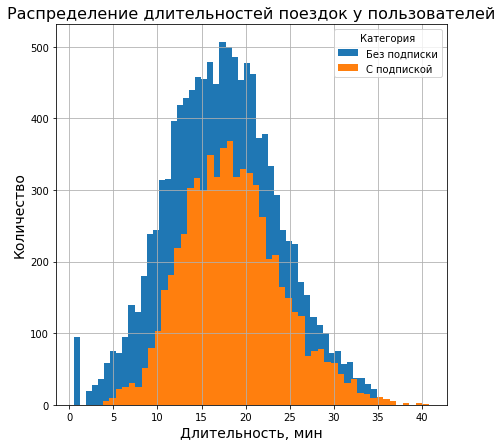

In [40]:
ax = df_free['duration'].hist(bins = 50, figsize = (7,7))
df_ultra['duration'].hist(ax=ax, bins = 50, figsize = (7,7))
plt.xlabel('Длительность, мин', fontsize = 14)
plt.ylabel('Количество', fontsize = 14)
plt.legend(title = 'Категория', labels = ['Без подписки','С подпиской'])
plt.title('Распределение длительностей поездок у пользователей', fontsize = 16)
plt.show()

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Объединил графики для длительностей поездок.
</div>

У обоих групп пользователей гистограмма представлена нормальным распределением с центром в районе 17 минут. Однако у платных пользователей нет всплеска на первой минуте, как у пользователей без подписки, и длительность поездок некоторых пользователей доходит до 40+ минут, в отличии от 35 минут у пользователей без подписки.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично, различия в поведении двух групп пользователей изучили!  </div>

#### Шаг 5. Подсчёт выручки

Создадим аггрегированный датафрейм с данными о расстоянии, длительности и количестве поездок для каждого пользователя в каждом месяце.
Для этого создадим 2 сводные таблицы. В одной будут агреггированные данные о расстоянии и длительности, в другой - о количестве поездок. Затем мы соединим 2 таблицы.

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Перед созданием сводной таблицы округлим данные о длительности поездок в исходном датафрейме до следующего целого числа
</div>

In [41]:
# сохраним округленные данные в новом столбце исходного датафрейма
df['duration_rounded'] = np.ceil(df['duration'])

In [42]:
# посмотрим работу функции
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,duration_rounded
0,1,кира,22,тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199,26.0
1,1,кира,22,тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199,16.0
2,1,кира,22,тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199,7.0
3,1,кира,22,тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199,19.0
4,1,кира,22,тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199,27.0


<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Данные успешно округлены
</div>

In [43]:
df_user_by_month1 = df.pivot_table (index = ['user_id','month'], values = ['distance','duration_rounded'], aggfunc = 'sum')
# округляем длительность поездки до следующего целого числа
df_user_by_month1

distance  duration_rounded
user_id month                                
1       1       7027.511294              42.0
        4        754.159807               7.0
        8       6723.470560              46.0
        10      5809.911100              32.0
        11      7003.499363              56.0
...                     ...               ...
1534    6       3409.468534              26.0
        8       7622.453034              48.0
        9       4928.173852              23.0
        11     13350.015305              78.0
        12      2371.711192              16.0

[11331 rows x 2 columns]

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Перед построением сводной таблицы и расчетом выручки длительность каждой поездки должна быть округлена до целой минуты.
    
    
P.S. Обязательно **до следующего целого числа**
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
✔
</div>

In [44]:
df_user_by_month2 = df.pivot_table (index = ['user_id','month'], values = 'distance', aggfunc = 'count')
# переименуем столбец с количеством поездок, т.к. метод .join() не позволит нам соединить таблицы,
# если в обоих будет столбец с названием "distance"
df_user_by_month2 = df_user_by_month2.rename(columns = {'distance':'rides'})
df_user_by_month2

rides
user_id month       
1       1          2
        4          1
        8          2
        10         2
        11         3
...              ...
1534    6          2
        8          2
        9          1
        11         4
        12         1

[11331 rows x 1 columns]

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Все нужные значения можно посчитать в одно действие. Удобнее для этого использовать `groupby`</div>

In [45]:
# соединяем таблицы
df_user_by_month = df_user_by_month1.join(df_user_by_month2)
df_user_by_month = df_user_by_month.reset_index()
df_user_by_month

,user_id,month,distance,duration_rounded,rides
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3
...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2
11327,1534,8,7622.453034,48.0,2
11328,1534,9,4928.173852,23.0,1
11329,1534,11,13350.015305,78.0,4


Мы получили таблицу с агреггированными данными о суммарном расстоянии, времени и количестве поездок для каждого пользователя в каждом месяце.

Нам необходимо добавить столбец с помесячной выручкой от каждого пользователя. 
Подсчет выручки отличается в зависимости от типа подписки, это нужно учитывать при расчетах.

Создадим датафрейм, который хранит тип подписки каждого пользователя.

In [46]:
users_and_types = users[['user_id','subscription_type']]
users_and_types['subscription_type'].unique()
users_and_types

,user_id,subscription_type
0,1,ultra
1,2,ultra
2,3,ultra
3,4,ultra
4,5,ultra
...,...,...
1529,1530,free
1530,1531,free
1531,1532,free
1532,1533,free


Соединим его с агреггированным датафреймом.

In [47]:
df_user_by_month = df_user_by_month.merge(users_and_types, on = 'user_id')
df_user_by_month

,user_id,month,distance,duration_rounded,rides,subscription_type
0,1,1,7027.511294,42.0,2,ultra
1,1,4,754.159807,7.0,1,ultra
2,1,8,6723.470560,46.0,2,ultra
3,1,10,5809.911100,32.0,2,ultra
4,1,11,7003.499363,56.0,3,ultra
...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2,free
11327,1534,8,7622.453034,48.0,2,free
11328,1534,9,4928.173852,23.0,1,free
11329,1534,11,13350.015305,78.0,4,free


Теперь в таблице df_user_by_month есть информация о типе подписки каждого пользователя. Исходя из этого, а также из данных о количестве поездок и расстоянии, которое каждый пользователь преодолел за месяц, можно посчитать ежемесячную выручку.

In [48]:
# создаем функцию, которая при наличии у пользователя подписки, суммирует абонентскую плату и произведение длительности 
# на стоимость 1 минуты, а при отсутсвии подписки суммирует произведение количества поездок на стоимость старта и произведение
# длительности на стоимость 1 минуты

def counting_revenue(row):
    duration = row['duration_rounded']
    rides = row['rides']
    sub_type = row['subscription_type']
    if sub_type == 'ultra':
        return 199 + duration*6
    else: 
# стоимость минуты без подписки составляет 8 рублей, а не 6
        return rides*50 + duration*8

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Метод округления продолжительности поездок выбран верный, но округлять необходимо каждую поездку, то есть в исходной объединенной таблице до агрегирования.


P.S. Применения np.ceil достаточно, round не нужен.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
✔
</div>

In [49]:
# применяем функцию
df_user_by_month['revenue'] = df_user_by_month.apply(counting_revenue, axis = 1)
df_user_by_month

,user_id,month,distance,duration_rounded,rides,subscription_type,revenue
0,1,1,7027.511294,42.0,2,ultra,451.0
1,1,4,754.159807,7.0,1,ultra,241.0
2,1,8,6723.470560,46.0,2,ultra,475.0
3,1,10,5809.911100,32.0,2,ultra,391.0
4,1,11,7003.499363,56.0,3,ultra,535.0
...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2,free,308.0
11327,1534,8,7622.453034,48.0,2,free,484.0
11328,1534,9,4928.173852,23.0,1,free,234.0
11329,1534,11,13350.015305,78.0,4,free,824.0


Готово. Мы получили столбец с прибылью от каждого пользователя в каждом месяце.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Метод apply применяет функцию построчно, это может быть критично на больших данных, код будет работать очень долго. Тут оптимальнее будет посчитать выручку с помощью простых векторных операций со столбцами (арифметические действия).


Код всегда стоит писать переиспользуемым, без ручного внесения значений. В объединенной таблице у нас уже есть все значения по тарифам для расчета выручки, их можно перенести в сводную таблицу, указав при группировке для них агрегирующую функцию 'first' (или 'min'). Или можно к сводной таблице присоединить таблицу с подписками. Тогда все необходимые данные будут в сводной таблице и мы сможем посчитать выручку простыми арифметическими действиями со столбцами сводной таблицы и формула будет единой для обеих групп пользователей.</div>

#### Шаг 6. Проверка гипотез

Проверим гипотезу о том, что пользователи с подпиской тратят больше времени на поездки.
Это пример о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза: пользователи с подпиской тратят в среднем столько же времени на поездки, сколько пользователи без подписки.

Альтернативная гипотеза: пользователи с подпиской тратят на поездки больше времени.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Здорово, что формулируешь гипотезы перед проверкой!</div>

In [50]:
# устанавливаем уровень статистической значимости в 5%
alpha = 0.05
# устанавливаем параметр equal_var = False, т.к. размеры выборок разные. В параметре "alternative"
# указываем "greater", т.к. альтернативная теория правостороняя
results = st.ttest_ind(df_ultra['duration'],df_free['duration'], equal_var = False, alternative = 'greater')
print(f'p-value равно {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value равно 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Похоже на то, что пользователи с подпиской действительно в среднем больше тратят времени на поездки.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Верно</div>

Проверим гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров.
Это пример односторонней гипотезы о равенстве среднего генеральной совокупности некоторому значению.

Нулевая гипотеза: среднее расстояние, которую проезжает пользователь с подпиской, меньше или равна 3130 метрам.

Альтернативная гипотеза: среднее расстояние превышает 3130 метров.

In [51]:
alpha = 0.05
results = st.ttest_1samp(df_ultra['distance'], 3130, alternative = 'greater')
print(f'p-value равно {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value равно 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Гипотеза о том, что платящие пользователи в среднем преодолевают расстояние меньшее или равное 3130 метрам, вполне правдоподобно. Мы ее не отвергаем (но и не подтверждаем).

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Все так</div>

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Это пример односторонней гипотезы о равенстве средних 2-х генеральных совокупностей.

Нулевая гипотеза: средняя выручка от пользователей с подпиской выше или равна выручке от пользователей без подписки.

Альтернативная гипотеза: средня выручка от пользователей с подпиской ниже.

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
    
Исправленная нулевая гипотеза: помесячная выручка от пользователей с подпиской не отличается от выручки пользователей без подписки.
    
Исправленная альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше.
</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Эта гипотеза по структуре похожа на первую. Нулевая гипотеза должна быть сформулирована о равенстве выручек, а альтернативная на основании предположения, которое мы хотим проверить. 
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [52]:
# сохраним данные о помесячной выручке каждой группы в отдельные переменные
ultra_revenue = df_user_by_month.query('subscription_type == "ultra"')['revenue']
free_revenue = df_user_by_month.query('subscription_type == "free"')['revenue']

In [53]:
alpha = 0.05
# выборки не равны, поэтому в "equal_var" указываем "False"
results = st.ttest_ind(ultra_revenue,free_revenue,equal_var = False, alternative = 'greater')
print(f'p-value равно {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value равно 8.874140893976874e-40
Отвергаем нулевую гипотезу


Похоже на то, что средняя выручка от пользователей с подпиской как минимум не меньше выручки от пользователей без подписки. Гипотеза не отвергается.

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> отвергаем гипотезу о том, что прибыль от подписчиков и неподписчиков равна. Вероятно подписчики более выгодны сервису, как и предполагалось продакт-менеджерами.
</div>

<i>Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?</i>

Данный случай представляет с собой гипотезу о равенстве средних для зависимых выборок. В python она проверяется с помощью метода st.ttest_rel(), в аргументах которого нужно указать данные до и после изменений.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Метод выбран верно </div>

#### Шаг 7. Распределения

Нам необходимо узнать сколько промокодов нужно раздать, чтобы минимум 100 существующих клиентов продлили подписку, при условии, что вероятность продления равно 10%.

In [54]:
# задаем вероятность продления
p = 0.1
# задаем начальное количество промокодов
n = 1000
# задаем минимальное количество успешных попыток
k = 100
# задаем целевую вероятность
target = 0.05

for n in range(n,)
while True:
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k)
    if prob <= target:
        break
    else: n+=1

print(f'Минимальное количество промокодов равно {n}')

SyntaxError: invalid syntax (2960814153.py, line 10)

In [ ]:
# задаем вероятность продления
p = 0.1
# задаем количество промокодов
n = 1000
# строим график биномиального распределения
distr = []
for k in range(0, n+1):
    
     
    distr.append(prob)
plt.bar(range(0, n + 1), distr)
plt.xlabel('Количество пользователей, продлевающих подписку')
plt.ylabel('Вероятность')
plt.xlim(0,200)
plt.show()

Посмотрим с какой вероятностью мы выполним план при данном количестве промокодов с помощью функции .cdf()

In [ ]:
dist = st.binom(n=n, p=p)
exp_prob = 1 - dist.cdf(100)
f'Вероятность набрать достаточное количество пользователей, продлевающих подписку, равна {round(exp_prob*100,2)}%'

1000 промокодов недостаточно. Попробуем 1200 промокодов.

In [ ]:
n = 1200
dist = st.binom(n=n,p=p)
exp_prob = 1 - dist.cdf(100)
f'Вероятность набрать достаточное количество пользователей, продлевающих подписку, равна {round(exp_prob*100,2)}%'

Чтобы вероятность не выполнить план была ниже 5% нужно раздать ~1200 промокодов.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Но ведь нам нужно узнать количество промокодов, при котором вероятность не выполнить план будет **примерно** 
5%. 
    
Для решения этой задачи лучше подбирать подходящее значение параметра n (количество промокодов) в цикле для заданного параметра p = 0.1 (вероятность успеха) с помощью метода `binom.cdf()` (вероятность не выполнить план)  и сравнивая результат с заданной вероятностью невыполнить план </div>

Таким образом в ходе анализа мы выяснили, что сервисом пользуются в 8 городах. Наиболее популярный из них - Пятигорск.
Платной подпиской обладают 46% пользователей. Средний возраст пользователей составляет 20-30 лет. Среднее время поездки равно 15-20 минут, а среднее расстояние - 3000 метров.
Проверили гипотезы о том, что пользователи с подпиской в среднем дольше пользуются самокатом, среднее расстояние их поездки не превышает 3130 метров и они приносят больше прибыли, чем пользователи без подписки. 
Выяснили, что в акции с промокодами, нужно раздать около 1200 промокодов, чтобы вероятность не достигнуть порога в 100 пользователей, продливших подписку, была менее 5%.

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
В ходе работы была выполнена предобработка исходных данных: удаление дубликатов, добавление новых столбцов и изменение типа данных в некоторых исходных столбцах. 3 исходных файла были объединены в один датафрейм. Сгруппировали данные о расстоянии и длительности поездок каждого пользователя по месяцам. Вычислили помесячную выручку каждого пользователя.

Выяснили, что сервисом пользуются в 8 городах. Наиболее популярный из них - Пятигорск. Платной подпиской обладают 46% пользователей. Средний возраст пользователей составляет 20-30 лет. Среднее время поездки равно 15-20 минут, а среднее расстояние - 3000 метров. Проверили гипотезы о том, что пользователи с подпиской в среднем дольше пользуются самокатом, среднее расстояние их поездки не превышает 3130 метров и они приносят больше прибыли, чем пользователи без подписки. 

Статистический анализ показал, что в представленной выборке пользователи, платящие ежемесячную абонентскую плату за сервис, более выгодны компании, т.к. тратят больше времени на поездки и средняя ежемесячная выручка от них выше, чем от пользователей без платной подписки на сервис.    
</div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Итоговый вывод должен быть немного подробнее и содержать краткую информацию о том, какая работа была проделана и какие результаты получены по всем пунктам исследования, в том числе по пунктам знакомства с данными и их предобработки.
    
Человек, заинтересовавшийся твоим проектом, может сразу перейти к выводу, чтобы понять нужно ли ему углубляться в изучение исследования или нет.

Могу посоветовать следующую структуру итогового вывода:

 - **Краткий обзор проведенной работы.** Что выполнили, сделали, рассчитали. Что получили, выяснили.
 - **Главные выводы.** Дайте ответы на поставленные вопросы. (В данном случае нужен аргументированный ответ на вопрос, являются ли пользователи с подпиской более выгодными для компании).
 - **Рекомендации.** Например, вы можете посоветовать отобрать определенные признаки для прогнозирования в будущем, или дать рекомендации о том, как избежать появления дубликатов или пропущенных значений.

**Хочу обратить твое внимание на то, что после исправления замечаний в некоторых пунктах исследования могут измениться результаты, поэтому нужно будет подкорректировать выводы.**</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>